In [206]:
import csv
import pandas as pd
from scipy.stats import chi2_contingency

import final_project_functions

# 1. Control = Get list of humanIDs and get list of SNPs

In [207]:
def convert_rawSNPData_to_Standard(snp_list):

    standard_snp_list = []

    for humanGene in snp_list:
        if humanGene == "0|0":
            standard_snp_list.append(0)
        elif humanGene == "1|0" or humanGene == "0|1":
            standard_snp_list.append(1)
        elif humanGene == "1|1":
            standard_snp_list.append(2)

    return standard_snp_list

In [208]:
def get_humanIDsList_SNPsList_control(file_in):

    # Open the CSV file with the open() function
    # This returns a file object that you can use to read the file
    with open(file_in) as csvfile:

        # Use the csv.reader() function to read the file
        # This returns an iterable object that you can loop over
        data = csv.reader(csvfile)

        rawRowDataAsList = []

        # Loop over the rows in the file
        for row in data:
            rawRowDataAsList.append(row)

        # HUMAN IDs 
        rawHumanIDs = rawRowDataAsList[19][0].split("\t")
        # print('rawHumanIDs\n', rawHumanIDs)
        humanIDs = rawHumanIDs[9: len(rawHumanIDs)-1]
        # print('humanIDs\n', humanIDs)

        # GENE DATA
        rawSNPData = rawRowDataAsList[20: len(rawRowDataAsList)-1]
        # print('rawGeneData\n', rawGeneData)

        geneData = [] 
        for row in rawSNPData:
            rawGeneRowParsed = row[0].split("\t")
            snp_list = rawGeneRowParsed[9:len(rawGeneRowParsed)-1]
            standard_snp_list = convert_rawSNPData_to_Standard(snp_list)
            geneData.append(standard_snp_list)
        # print("geneData\n", geneData)

    return (humanIDs, geneData)

In [209]:
# humanIDs_control, SNPData_control =  get_humanIDsList_SNPsList_control("testData/rs4713266.csv")
humanIDs_control, SNPData_control =  get_humanIDsList_SNPsList_control("testData/chr2-15k-30k.csv")
# humanIDs_control, SNPData_control =  get_humanIDsList_SNPsList_control("testData/chr2-1mil-2mil.csv")
# humanIDs_control, SNPData_control =  get_humanIDsList_SNPsList_control("testData/chr2-10mil-20mil.csv")

In [210]:
# print("SNPData_control\n", SNPData_control)
print(len(humanIDs_control))

2547


In [211]:
def get_humanID_to_PopulationCode(file_in):

    # Open the CSV file with the open() function
    # This returns a file object that you can use to read the file
    with open(file_in) as csvfile:
        
        # Use the csv.reader() function to read the file
        # This returns an iterable object that you can loop over
        data = csv.reader(csvfile)

        rawRowDataAsList = []

        # Loop over the rows in the file
        for row in data:
            rawRowDataAsList.append(row)

        humanIDInfoHeader = rawRowDataAsList[0][0].split("\t")
        del rawRowDataAsList[0]

        humanInfoParsed = []

        for rawHumanInfo in rawRowDataAsList:
            singleHumanInfoParsed = rawHumanInfo[0].split("\t")
            humanInfoParsed.append(singleHumanInfoParsed)

        humanID_to_PopulationCode = {}

        for humanInfo in humanInfoParsed:
            humanID = humanInfo[0]
            populationCode = humanInfo[3]
            humanID_to_PopulationCode[humanID] = populationCode

    return humanID_to_PopulationCode

In [212]:
humanID_to_PopulationCode_sample = get_humanID_to_PopulationCode('rawData/igsr_samples.tsv')

In [213]:
print(len(humanID_to_PopulationCode_sample))
# print("humanID_to_PopulationCode_sample\n", humanID_to_PopulationCode_sample)

4978


In [214]:
populationCodes = []
for humanID in humanIDs_control:
    populationCode = humanID_to_PopulationCode_sample.get(humanID)
    populationCodes.append(populationCode)

In [215]:
# Create the dataframe with specified column names
df = pd.DataFrame(SNPData_control, columns=populationCodes)

# Print the dataframe
# print(df)

In [216]:
snps_populationCode_to_genotype_control = []

# Loop through every row in the dataframe
# i = 0
for index, row in df.iterrows():
    # Loop through every column name in the dataframe
    # j = 0
    snp_populationCode_to_genotype = []
    for x in range(len(df.columns)):
        # Print the values in each column
        # print(row[x])
    # for col in df.columns:
        # Print the values in each column
        # print(type())
        # populationCode_to_genotype[df.columns[x]] = row[x]
        snp_populationCode_to_genotype.append([df.columns[x], row[x]])
    #     print("--", i, j, "Population Code:", df.columns[x], "Genotype:", row[x], "...END...")
    #     j += 1
    # i += 1
    snps_populationCode_to_genotype_control.append(snp_populationCode_to_genotype)

# print("populationCode_to_genotype_control\n", snps_populationCode_to_genotype_control)

In [217]:
snps_list_populationCode_to_geneFrequencies_control = []

for snp in snps_populationCode_to_genotype_control:

    populationCode_to_geneFrequencies = {}

    for populationCode_genotype in snp:

        populationCode = populationCode_genotype[0]
        genotype = populationCode_genotype[1]

        if genotype == 0:
                genotypeList = [1, 0, 0]
        elif genotype == 1:
            genotypeList = [0, 1, 0]
        elif genotype == 2:
            genotypeList = [0, 0, 1]

        if populationCode not in populationCode_to_geneFrequencies.keys():
            populationCode_to_geneFrequencies[populationCode] = genotypeList

        elif populationCode in populationCode_to_geneFrequencies.keys():
            currentGenotypeList = populationCode_to_geneFrequencies.get(populationCode)

            # Use a list comprehension to add the elements from the two lists together
            totalGenotypeList = [x + y for x, y in zip(currentGenotypeList, genotypeList)]

            populationCode_to_geneFrequencies[populationCode] = totalGenotypeList

    snps_list_populationCode_to_geneFrequencies_control.append(populationCode_to_geneFrequencies)

In [218]:
print(len(snps_list_populationCode_to_geneFrequencies_control))
print(len(snps_list_populationCode_to_geneFrequencies_control[0]))
# print("snps_list_populationCode_to_geneFrequencies_control\n", snps_list_populationCode_to_geneFrequencies_control)

566
26


In [219]:
def create_df_from_populationCode_to_geneFrequencies(populationCode_to_geneFrequencies):
    
    geneFrequenciesList = []
    populationCodesList = []
    for key, value in populationCode_to_geneFrequencies.items():
        geneFrequenciesList.append(value)
        populationCodesList.append(key)

    # Create a list of column names
    columns = ['Recesssive', 'Heterozygous', 'Dominant']

    # Convert the list of lists to a DataFrame
    df = pd.DataFrame(geneFrequenciesList, columns=columns, index=populationCodesList)

    # Print the resulting DataFrame
    # print(df)

    return df

In [220]:
def perform_chi_square_test(df):

    # Perform the chi-square test
    try: 
        chi2, p, dof, expected = chi2_contingency(df)
        return [chi2, p]
    except:
        return -1

In [221]:
def get_chi2_p_forEachSNP_list(snps_list_populationCode_to_geneFrequencies_control):

    chi2_p_list = []

    for snp in snps_list_populationCode_to_geneFrequencies_control:

        df = create_df_from_populationCode_to_geneFrequencies(snp)
        # print(df)
        chi2_p = perform_chi_square_test(df)

        chi2_p_list.append(chi2_p)
    
    return chi2_p_list

In [222]:
snps_chi2_p_list = get_chi2_p_forEachSNP_list(snps_list_populationCode_to_geneFrequencies_control)

In [223]:
print(len(snps_chi2_p_list))
# print("snps_chi2_p_list\n", snps_chi2_p_list)

566


In [224]:
totalSNPS = len(snps_chi2_p_list)

no_chi2_cnt = 0

chi2_list = []
p_value_list = []

for chi2_p in snps_chi2_p_list:

    if chi2_p == -1:
        no_chi2_cnt += 1

    else:
        chi2 = chi2_p[0]
        p_value = chi2_p[1]

        chi2_list.append(chi2)
        p_value_list.append(p_value)


no_chi2_percentage = (no_chi2_cnt/totalSNPS)*100

print("no_chi2_percentage\n", no_chi2_percentage)

print(len(chi2_list))
# print("chi2_list\n", chi2_list)

# print("p_value_list\n", p_value_list)


no_chi2_percentage
 83.03886925795054
96


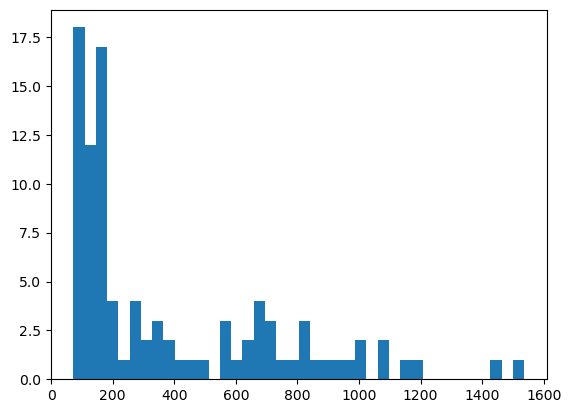

In [225]:
import matplotlib.pyplot as plt

# Create the histogram with 5 bins
plt.hist(chi2_list, bins=40)

# Show the histogram
plt.show()

In [226]:
import numpy as np

# Divide the list into the 95th percentile
p95 = np.percentile(chi2_list, 95)

# Print the value at the 95th percentile
print(p95)

1073.186305342551
